In [1]:
import cv2
import tensorflow as tf
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

In [2]:
#we will import things from vid3
model = tf.keras.models.load_model('RGB-NSFWvsCOM.model')

In [3]:
categories = ['NSFW', 'Normal', 'Unsure']

def process(img_url):
    img_array = cv2.imread(img_url)#, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (64, 64))
    new_array = np.array(new_array)
    new_array = new_array/255.0
    return new_array



In [4]:
folder = 'E:\Memories\Facebook'
test_list = [os.path.join(folder, i) for i in os.listdir(folder)]

In [5]:
TL = np.array([process(i) for i in test_list])

In [6]:
def dim(M):
    print (str(type(M)))
    if str(type(M)) in ['int', 'float', "<class 'numpy.float64'>"]:
        return []
    return [len(M)]+dim(M[0])

In [7]:
dim(TL)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


[730, 64, 64, 3]

In [8]:
predictions = model.predict([TL])

In [9]:
P = [i[0] for i in predictions]
R = []
for i in P:
    if i<0.2:
        R.append(0)
    elif i>0.8:
        R.append(1)
    else:
        R.append(2)


In [10]:
NSFW, Com, Unsure = [], [], []
K = [NSFW, Com, Unsure]
for i, r in enumerate(R):
    K[r].append(i)

In [17]:
def see(XL):
    for t in range(min(len(XL), 10)):
        #t = random.randint(0, len(XL)-1)
        print (t)
        plt.imshow(list(TL[XL[t]]))
        plt.title(str(predictions[XL][t][0]))
        plt.show()

In [18]:
for k in K:
    print (len(k))

199
420
111


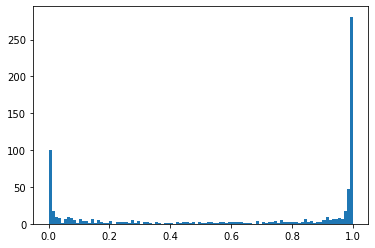

In [19]:
plt.hist(predictions, bins = 100)
plt.show()

0


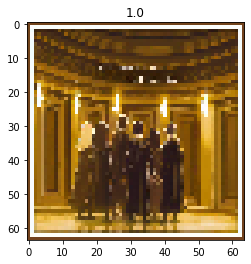

1


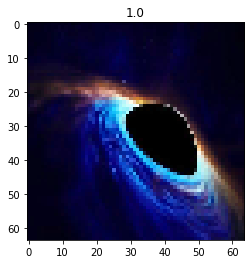

2


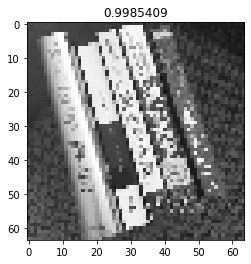

3


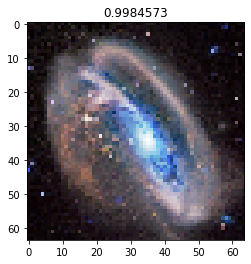

4


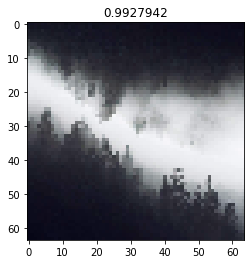

5


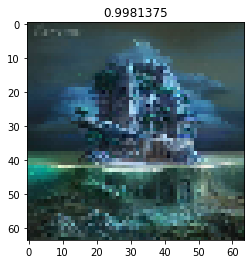

6


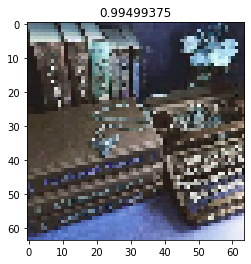

7


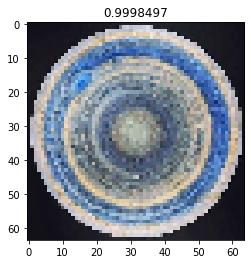

8


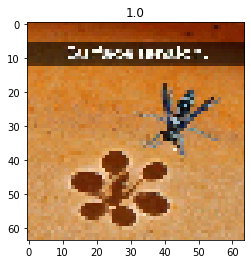

9


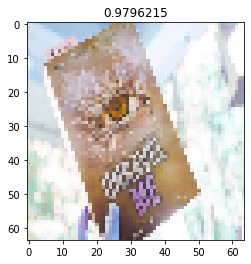

In [20]:
see(Com)

0


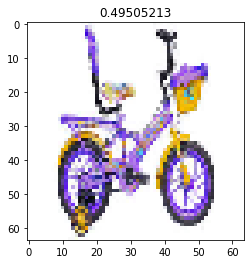

1


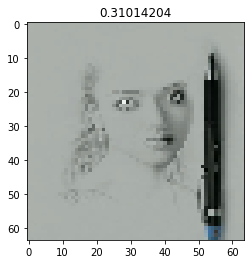

2


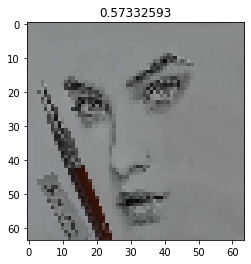

3


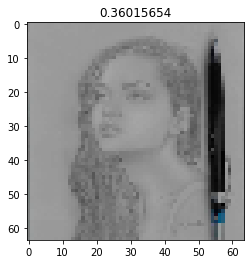

4


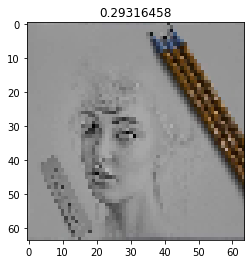

5


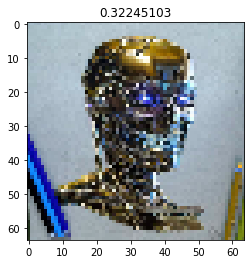

6


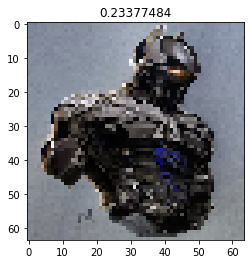

7


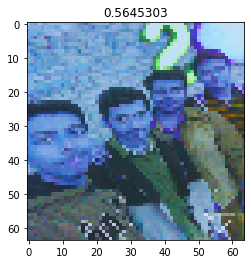

8


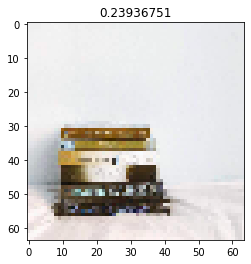

9


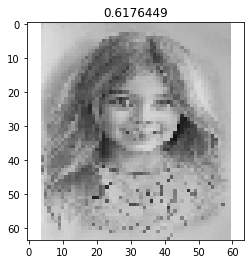

In [21]:
see(Unsure)

0


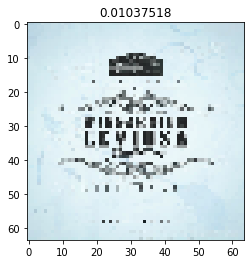

1


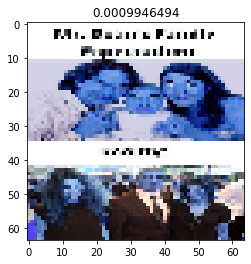

2


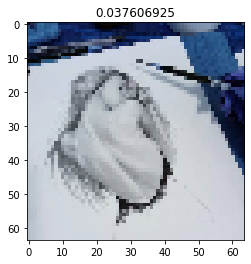

3


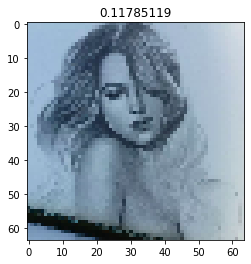

4


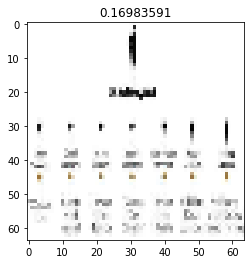

5


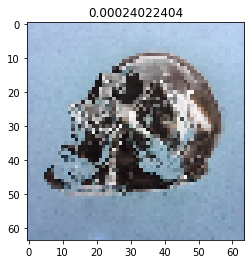

6


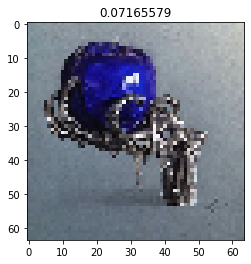

7


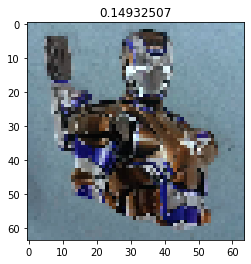

8


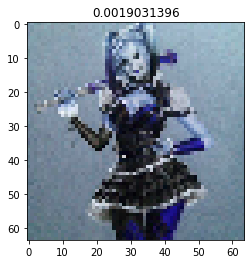

9


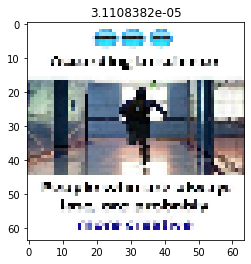

In [22]:
see(NSFW)